## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (paranoid)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/user/notebooks/pcaps/nmap_fin_scan_paranoid'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [4]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

2197    329478.536484
Name: time, dtype: float64

In [5]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [6]:
scan_times
#duration_list

0    329478.536484
1    329481.468382
2    329479.534539
3    329476.343728
4    329479.819090
5    329477.333532
6    329478.708449
7    329479.940456
8    329477.956872
9    329477.568348
Name: Scan times, dtype: float64

In [7]:
temp = pd.DataFrame(duration_list)

In [8]:
temp.mean()

0    329478.720988
dtype: float64

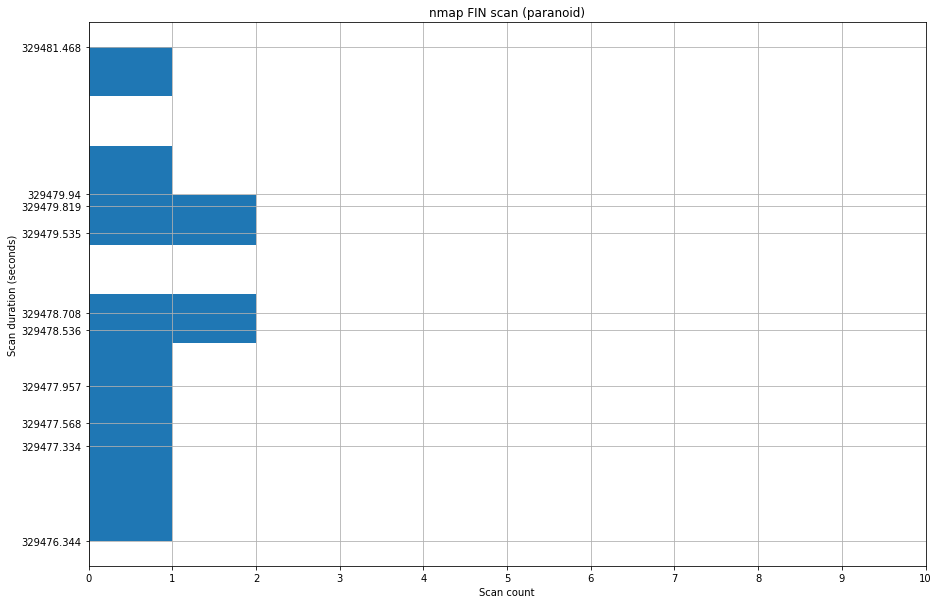

In [9]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [10]:
temp.describe()

,0
count,10.000000
mean,329478.720988
std,1.506505
min,329476.343728
25%,329477.665479
50%,329478.622466
75%,329479.747952
max,329481.468382


## Packet count

In [11]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [12]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 21980
Overall sent packets to scanner: 10990
Overall received packets from scanner: 10990


## Packets pr. second

In [13]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 0.06671144022318504



## Order of ports scanned


In [14]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 59325 8080
2 59325 139
3 59325 113
4 59325 53
5 59325 111
6 59325 256
7 59325 3389
8 59325 554
9 59325 8888
10 59325 1720
11 59330 8080
12 59325 25
13 59325 1025
14 59325 3306
15 59325 199
16 59325 995
17 59325 445
18 59325 80
19 59325 1723
20 59325 143
21 59325 22
22 59332 8080
23 59325 110
24 59325 23
25 59325 993
26 59325 5900
27 59325 135
28 59325 443
29 59325 21
30 59325 587
31 59325 32772
32 59325 2121
33 59334 8080
34 59325 1154
35 59325 3404
36 59325 2106
37 59325 1875
38 59325 6123
39 59325 8192
40 59325 2041
41 59325 1069
42 59325 49165
43 59325 44443
44 59336 8080
45 59325 6106
46 59325 88
47 59325 3322
48 59325 544
49 59325 1037
50 59325 3801
51 59325 3580
52 59325 8200
53 59325 8300
54 59325 9418
55 59338 8080
56 59325 19
57 59325 49156
58 59325 1088
59 59325 1287
60 59325 5987
61 59325 1043
62 59325 6789
63 59325 10003
64 59325 1042
65 59325 2035
66 59340 8080
67 59325 8000
68 59325 7937
69 59325 3
70 59325 1121
71 59325 2382
72 59325 873
73 59325 5357
74 59325 24800
75

572 59432 8080
573 59325 6969
574 59325 1045
575 59325 1972
576 59325 714
577 59325 5989
578 59325 5862
579 59325 16000
580 59325 667
581 59325 9001
582 59325 15000
583 59434 8080
584 59325 1036
585 59325 32777
586 59325 16018
587 59325 32781
588 59325 1074
589 59325 5850
590 59325 1093
591 59325 1839
592 59325 3659
593 59325 4550
594 59436 8080
595 59325 1055
596 59325 9290
597 59325 25735
598 59325 22939
599 59325 49154
600 59325 16080
601 59325 4224
602 59325 32775
603 59325 9998
604 59325 6547
605 59438 8080
606 59325 5060
607 59325 8042
608 59325 1236
609 59325 1097
610 59325 3826
611 59325 280
612 59325 8383
613 59325 10616
614 59325 1092
615 59325 2869
616 59440 8080
617 59325 1580
618 59325 444
619 59325 9999
620 59325 1310
621 59325 212
622 59325 20031
623 59325 50300
624 59325 16001
625 59325 1198
626 59325 2809
627 59442 8080
628 59325 6346
629 59325 1122
630 59325 2260
631 59325 16012
632 59325 4567
633 59325 777
634 59325 1028
635 59325 2909
636 59325 1717
637 59325 1091
6

498 64629 7103
499 64629 1123
500 64629 1
501 64629 1417
502 64629 20031
503 64629 5904
504 64629 222
505 64629 1719
506 64724 995
507 64629 3011
508 64629 1583
509 64629 10002
510 64629 3324
511 64629 4111
512 64629 10617
513 64629 6005
514 64629 5440
515 64629 9575
516 64629 636
517 64726 995
518 64629 3945
519 64629 2382
520 64629 8193
521 64629 1009
522 64629 4998
523 64629 8701
524 64629 1122
525 64629 3889
526 64629 2394
527 64629 5280
528 64728 995
529 64629 1687
530 64629 49152
531 64629 2105
532 64629 49165
533 64629 6106
534 64629 2021
535 64629 5269
536 64629 4444
537 64629 70
538 64629 5906
539 64730 995
540 64629 6547
541 64629 6543
542 64629 24800
543 64629 7002
544 64629 7402
545 64629 3580
546 64629 9878
547 64629 14238
548 64629 901
549 64629 60020
550 64732 995
551 64629 3367
552 64629 2099
553 64629 1106
554 64629 3918
555 64629 8045
556 64629 1186
557 64629 1971
558 64629 8008
559 64629 6788
560 64629 1051
561 64734 995
562 64629 2045
563 64629 6007
564 64629 5102
5

65 46600 3905
66 46615 587
67 46600 32777
68 46600 144
69 46600 3801
70 46600 32768
71 46600 1063
72 46600 3168
73 46600 5550
74 46600 8600
75 46600 60443
76 46600 9000
77 46617 587
78 46600 49167
79 46600 1084
80 46600 5269
81 46600 5999
82 46600 1175
83 46600 2717
84 46600 1100
85 46600 631
86 46600 5915
87 46600 6106
88 46619 587
89 46600 9003
90 46600 668
91 46600 15660
92 46600 3001
93 46600 5298
94 46600 5678
95 46600 902
96 46600 10001
97 46600 1666
98 46600 11967
99 46621 587
100 46600 1352
101 46600 5030
102 46600 8800
103 46600 5904
104 46600 3527
105 46600 999
106 46600 10621
107 46600 1137
108 46600 2251
109 46600 2103
110 46623 587
111 46600 5060
112 46600 2121
113 46600 9418
114 46600 9594
115 46600 903
116 46600 3260
117 46600 6007
118 46600 6779
119 46600 8081
120 46600 3325
121 46625 587
122 46600 8088
123 46600 416
124 46600 8083
125 46600 15002
126 46600 2161
127 46600 3945
128 46600 32771
129 46600 20005
130 46600 389
131 46600 3128
132 46627 587
133 46600 30
134 46

685 46600 4550
686 46600 545
687 46600 541
688 46600 777
689 46600 8090
690 46600 8200
691 46600 2065
692 46600 1840
693 46729 587
694 46600 1065
695 46600 9535
696 46600 1104
697 46600 49400
698 46600 2260
699 46600 1186
700 46600 5950
701 46600 301
702 46600 1029
703 46600 2557
704 46731 587
705 46600 13782
706 46600 3784
707 46600 5862
708 46600 1121
709 46600 311
710 46600 2500
711 46600 1149
712 46600 1862
713 46600 8007
714 46600 1322
715 46733 587
716 46600 38292
717 46600 1085
718 46600 2393
719 46600 13
720 46600 2968
721 46600 50636
722 46600 52848
723 46600 593
724 46600 1935
725 46600 2869
726 46735 587
727 46600 7938
728 46600 1300
729 46600 14000
730 46600 9618
731 46600 5555
732 46600 14238
733 46600 8010
734 46600 3689
735 46600 5004
736 46600 106
737 46737 587
738 46600 7777
739 46600 1052
740 46600 1074
741 46600 10628
742 46600 10243
743 46600 990
744 46600 54045
745 46600 1031
746 46600 366
747 46600 1287
748 46739 587
749 46600 1914
750 46600 1755
751 46600 1641
75

299 59355 16016
300 59355 1061
301 59355 2701
302 59355 1087
303 59355 1041
304 59355 7002
305 59355 9929
306 59355 20005
307 59355 2381
308 59414 1720
309 59355 6792
310 59355 1044
311 59355 20221
312 59355 27715
313 59355 15742
314 59355 5822
315 59355 32773
316 59355 700
317 59355 1322
318 59355 1090
319 59416 1720
320 59355 85
321 59355 49165
322 59355 1083
323 59355 44501
324 59355 1271
325 59355 5800
326 59355 49167
327 59355 1131
328 59355 11967
329 59355 212
330 59418 1720
331 59355 1052
332 59355 18988
333 59355 8087
334 59355 3260
335 59355 625
336 59355 444
337 59355 1051
338 59355 82
339 59355 3517
340 59355 49400
341 59420 1720
342 59355 2041
343 59355 50003
344 59355 106
345 59355 2161
346 59355 16993
347 59355 24
348 59355 1812
349 59355 2920
350 59355 2401
351 59355 8008
352 59422 1720
353 59355 1213
354 59355 3369
355 59355 2638
356 59355 8021
357 59355 16080
358 59355 35500
359 59355 1494
360 59355 5190
361 59355 3370
362 59355 2998
363 59424 1720
364 59355 2045
365 5

199 59913 1044
200 59913 8086
201 59913 14442
202 59913 57294
203 59913 1052
204 59913 1417
205 59913 33354
206 59913 82
207 59913 52848
208 59913 8333
209 59954 1025
210 59913 5801
211 59913 13456
212 59913 2920
213 59913 37
214 59913 1322
215 59913 6692
216 59913 1054
217 59913 49167
218 59913 33
219 59913 23502
220 59956 1025
221 59913 5431
222 59913 1111
223 59913 1062
224 59913 8001
225 59913 259
226 59913 17
227 59913 32
228 59913 406
229 59913 1070
230 59913 1309
231 59958 1025
232 59913 1037
233 59913 10215
234 59913 1947
235 59913 50636
236 59913 2007
237 59913 7025
238 59913 4006
239 59913 1000
240 59913 3370
241 59913 5061
242 59960 1025
243 59913 515
244 59913 5440
245 59913 10025
246 59913 3261
247 59913 10621
248 59913 683
249 59913 9002
250 59913 1443
251 59913 5911
252 59913 8292
253 59962 1025
254 59913 44501
255 59913 52822
256 59913 49153
257 59913 1069
258 59913 2107
259 59913 1862
260 59913 32782
261 59913 6881
262 59913 6059
263 59913 1501
264 59964 1025
265 59913

866 59913 4
867 59913 1138
868 59913 32771
869 60074 1025
870 59913 54045
871 59913 3390
872 59913 25735
873 59913 2910
874 59913 106
875 59913 1154
876 59913 3703
877 59913 12174
878 59913 1033
879 59913 6005
880 60076 1025
881 59913 8383
882 59913 4242
883 59913 10629
884 59913 1434
885 59913 1038
886 59913 2068
887 59913 1002
888 59913 2608
889 59913 2869
890 59913 3003
891 60078 1025
892 59913 1031
893 59913 19315
894 59913 34572
895 59913 1248
896 59913 1058
897 59913 1001
898 59913 7103
899 59913 52673
900 59913 1174
901 59913 16993
902 60080 1025
903 59913 50300
904 59913 1099
905 59913 512
906 59913 8500
907 59913 7676
908 59913 2040
909 59913 1287
910 59913 52869
911 59913 4899
912 59913 1104
913 60082 1025
914 59913 3826
915 59913 5999
916 59913 2022
917 59913 49400
918 59913 1065
919 59913 5033
920 59913 1864
921 59913 2034
922 59913 1059
923 59913 1061
924 60084 1025
925 59913 691
926 59913 27000
927 59913 1036
928 59913 1021
929 59913 6668
930 59913 8084
931 59913 311
932 

433 41765 1030
434 41765 7103
435 41765 5000
436 41765 6779
437 41765 1165
438 41765 10626
439 41765 1023
440 41848 256
441 41765 1417
442 41765 1045
443 41765 9102
444 41765 9878
445 41765 3301
446 41765 2119
447 41765 2046
448 41765 41511
449 41765 50001
450 41765 83
451 41850 256
452 41765 3323
453 41765 3268
454 41765 5226
455 41765 912
456 41765 749
457 41765 6389
458 41765 32779
459 41765 711
460 41765 1839
461 41765 6788
462 41852 256
463 41765 4899
464 41765 8031
465 41765 17988
466 41765 987
467 41765 636
468 41765 18101
469 41765 1057
470 41765 1247
471 41765 5810
472 41765 5631
473 41854 256
474 41765 6565
475 41765 2160
476 41765 2605
477 41765 3546
478 41765 54328
479 41765 5298
480 41765 10003
481 41765 3827
482 41765 1092
483 41765 5633
484 41856 256
485 41765 65129
486 41765 1063
487 41765 1137
488 41765 5060
489 41765 1864
490 41765 1900
491 41765 48080
492 41765 406
493 41765 4006
494 41765 1071
495 41858 256
496 41765 65000
497 41765 4449
498 41765 32
499 41765 524
5

1099 41765 7
1 57412 80
2 57412 23
3 57412 8080
4 57412 1723
5 57412 143
6 57412 587
7 57412 25
8 57412 3389
9 57412 22
10 57412 993
11 57417 80
12 57412 1720
13 57412 995
14 57412 554
15 57412 3306
16 57412 135
17 57412 21
18 57412 110
19 57412 111
20 57412 53
21 57412 443
22 57419 80
23 57412 1025
24 57412 256
25 57412 5900
26 57412 139
27 57412 199
28 57412 445
29 57412 113
30 57412 8888
31 57412 14000
32 57412 1104
33 57421 80
34 57412 5214
35 57412 8084
36 57412 61532
37 57412 2383
38 57412 843
39 57412 8383
40 57412 1138
41 57412 1119
42 57412 1077
43 57412 1067
44 57423 80
45 57412 32774
46 57412 34573
47 57412 711
48 57412 5815
49 57412 8031
50 57412 1050
51 57412 9103
52 57412 16012
53 57412 8083
54 57412 9002
55 57425 80
56 57412 5950
57 57412 5566
58 57412 2045
59 57412 1113
60 57412 9040
61 57412 1658
62 57412 1145
63 57412 1095
64 57412 37
65 57412 1721
66 57427 80
67 57412 60443
68 57412 3283
69 57412 9100
70 57412 30718
71 57412 5810
72 57412 1026
73 57412 54045
74 57412

667 57412 8007
668 57412 99
669 57412 32768
670 57412 8010
671 57537 80
672 57412 1055
673 57412 2725
674 57412 1310
675 57412 83
676 57412 8400
677 57412 6543
678 57412 3030
679 57412 2119
680 57412 13782
681 57412 1151
682 57539 80
683 57412 2121
684 57412 2049
685 57412 555
686 57412 5862
687 57412 5087
688 57412 1185
689 57412 1062
690 57412 9011
691 57412 49163
692 57412 4005
693 57541 80
694 57412 10003
695 57412 9
696 57412 2608
697 57412 406
698 57412 5877
699 57412 55555
700 57412 49156
701 57412 10001
702 57412 1433
703 57412 70
704 57543 80
705 57412 5987
706 57412 7025
707 57412 4125
708 57412 5631
709 57412 254
710 57412 10009
711 57412 1201
712 57412 5550
713 57412 8300
714 57412 1021
715 57545 80
716 57412 7
717 57412 548
718 57412 54328
719 57412 8180
720 57412 1533
721 57412 4242
722 57412 5225
723 57412 2161
724 57412 3998
725 57412 992
726 57547 80
727 57412 3168
728 57412 7938
729 57412 1054
730 57412 2107
731 57412 6106
732 57412 2068
733 57412 5120
734 57412 3869


234 40385 1022
235 40385 161
236 40385 30951
237 40385 1998
238 40385 6003
239 40385 8193
240 40385 2382
241 40385 32782
242 40432 256
243 40385 6901
244 40385 54328
245 40385 1556
246 40385 911
247 40385 668
248 40385 8002
249 40385 2040
250 40385 2701
251 40385 8084
252 40385 5060
253 40434 256
254 40385 9011
255 40385 20221
256 40385 2038
257 40385 6006
258 40385 3690
259 40385 2010
260 40385 2100
261 40385 4224
262 40385 49154
263 40385 5903
264 40436 256
265 40385 1026
266 40385 55555
267 40385 666
268 40385 6792
269 40385 8254
270 40385 50500
271 40385 990
272 40385 340
273 40385 5566
274 40385 1455
275 40438 256
276 40385 144
277 40385 2099
278 40385 5961
279 40385 8701
280 40385 500
281 40385 3017
282 40385 3372
283 40385 1717
284 40385 497
285 40385 417
286 40440 256
287 40385 5901
288 40385 524
289 40385 48080
290 40385 8009
291 40385 109
292 40385 40911
293 40385 7
294 40385 5904
295 40385 7800
296 40385 700
297 40442 256
298 40385 1186
299 40385 9207
300 40385 1175
301 4038

900 40385 6668
901 40385 5102
902 40552 256
903 40385 6510
904 40385 3826
905 40385 1087
906 40385 1124
907 40385 54045
908 40385 37
909 40385 8081
910 40385 1076
911 40385 19350
912 40385 50001
913 40554 256
914 40385 4111
915 40385 2190
916 40385 1185
917 40385 14441
918 40385 1046
919 40385 30
920 40385 5730
921 40385 311
922 40385 366
923 40385 2121
924 40556 256
925 40385 5906
926 40385 2909
927 40385 26
928 40385 3071
929 40385 765
930 40385 1058
931 40385 99
932 40385 987
933 40385 17
934 40385 6004
935 40558 256
936 40385 1494
937 40385 8192
938 40385 3006
939 40385 264
940 40385 1027
941 40385 32770
942 40385 13782
943 40385 1999
944 40385 65129
945 40385 1038
946 40560 256
947 40385 18040
948 40385 5877
949 40385 2492
950 40385 55055
951 40385 1034
952 40385 1113
953 40385 6566
954 40385 1272
955 40385 49175
956 40385 1236
957 40562 256
958 40385 2105
959 40385 8083
960 40385 10215
961 40385 3013
962 40385 903
963 40385 1145
964 40385 3551
965 40385 1063
966 40385 5810
967 40

468 59541 1107
469 59541 10566
470 59541 1024
471 59541 8022
472 59541 21571
473 59630 53
474 59541 32777
475 59541 8087
476 59541 4002
477 59541 912
478 59541 687
479 59541 1864
480 59541 1311
481 59541 5802
482 59541 7627
483 59541 8701
484 59632 53
485 59541 19101
486 59541 54045
487 59541 311
488 59541 8443
489 59541 15004
490 59541 9050
491 59541 1054
492 59541 2170
493 59541 42510
494 59541 1721
495 59634 53
496 59541 55600
497 59541 1862
498 59541 40193
499 59541 2701
500 59541 1052
501 59541 5730
502 59541 1110
503 59541 5633
504 59541 9103
505 59541 648
506 59636 53
507 59541 3971
508 59541 9071
509 59541 34571
510 59541 1077
511 59541 1248
512 59541 5051
513 59541 41511
514 59541 1095
515 59541 427
516 59541 1050
517 59638 53
518 59541 9002
519 59541 3301
520 59541 2021
521 59541 9944
522 59541 1641
523 59541 8010
524 59541 5221
525 59541 1059
526 59541 84
527 59541 259
528 59640 53
529 59541 58080
530 59541 10000
531 59541 8800
532 59541 254
533 59541 9290
534 59541 1443
535

35 58919 1007
36 58919 1812
37 58919 20828
38 58919 10621
39 58919 19842
40 58919 8087
41 58919 32771
42 58919 1093
43 58919 6881
44 58930 111
45 58919 49159
46 58919 4004
47 58919 3851
48 58919 2710
49 58919 2288
50 58919 3071
51 58919 1089
52 58919 146
53 58919 5811
54 58919 1046
55 58932 111
56 58919 6004
57 58919 32777
58 58919 3914
59 58919 60443
60 58919 26214
61 58919 3011
62 58919 7911
63 58919 8400
64 58919 1068
65 58919 6565
66 58934 111
67 58919 19283
68 58919 1123
69 58919 6566
70 58919 1236
71 58919 8031
72 58919 4045
73 58919 6009
74 58919 50636
75 58919 9593
76 58919 10024
77 58936 111
78 58919 2968
79 58919 464
80 58919 6001
81 58919 3261
82 58919 1434
83 58919 2608
84 58919 49154
85 58919 444
86 58919 3372
87 58919 6646
88 58938 111
89 58919 9944
90 58919 2170
91 58919 2106
92 58919 2602
93 58919 8002
94 58919 49165
95 58919 1165
96 58919 1024
97 58919 801
98 58919 4899
99 58940 111
100 58919 2126
101 58919 280
102 58919 3871
103 58919 1233
104 58919 8007
105 58919 610

701 58919 55555
702 58919 6668
703 58919 8651
704 59050 111
705 58919 8994
706 58919 1141
707 58919 7103
708 58919 1113
709 58919 1119
710 58919 1862
711 58919 31337
712 58919 5414
713 58919 5510
714 58919 12345
715 59052 111
716 58919 44501
717 58919 5120
718 58919 34571
719 58919 5877
720 58919 32769
721 58919 2068
722 58919 55055
723 58919 5815
724 58919 912
725 58919 14000
726 59054 111
727 58919 7002
728 58919 407
729 58919 6510
730 58919 2399
731 58919 8652
732 58919 3333
733 58919 44176
734 58919 524
735 58919 7800
736 58919 2382
737 59056 111
738 58919 513
739 58919 1719
740 58919 3918
741 58919 15742
742 58919 2179
743 58919 1009
744 58919 64680
745 58919 1114
746 58919 1972
747 58919 9111
748 59058 111
749 58919 40911
750 58919 4443
751 58919 17877
752 58919 6389
753 58919 17988
754 58919 5987
755 58919 1117
756 58919 52848
757 58919 4343
758 58919 2909
759 59060 111
760 58919 3003
761 58919 32775
762 58919 4444
763 58919 5033
764 58919 14238
765 58919 6567
766 58919 9415
767

In [15]:
orders_port

,scannr,sport,dport
0,1,59325,8080
1,2,59325,139
2,3,59325,113
3,4,59325,53
4,5,59325,111
...,...,...,...
10985,1095,58919,52869
10986,1096,58919,8290
10987,1097,58919,3527
10988,1098,58919,6580


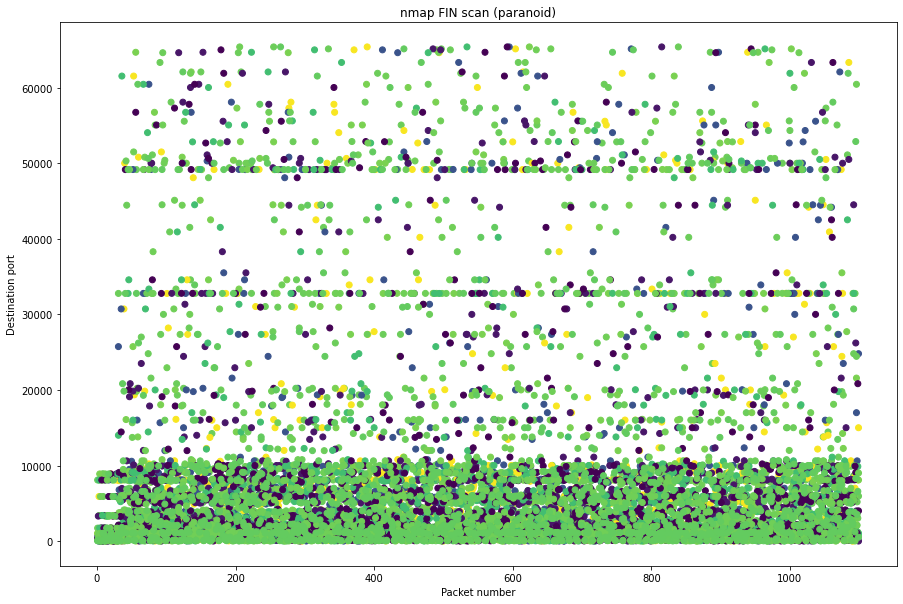

In [16]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [17]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [18]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

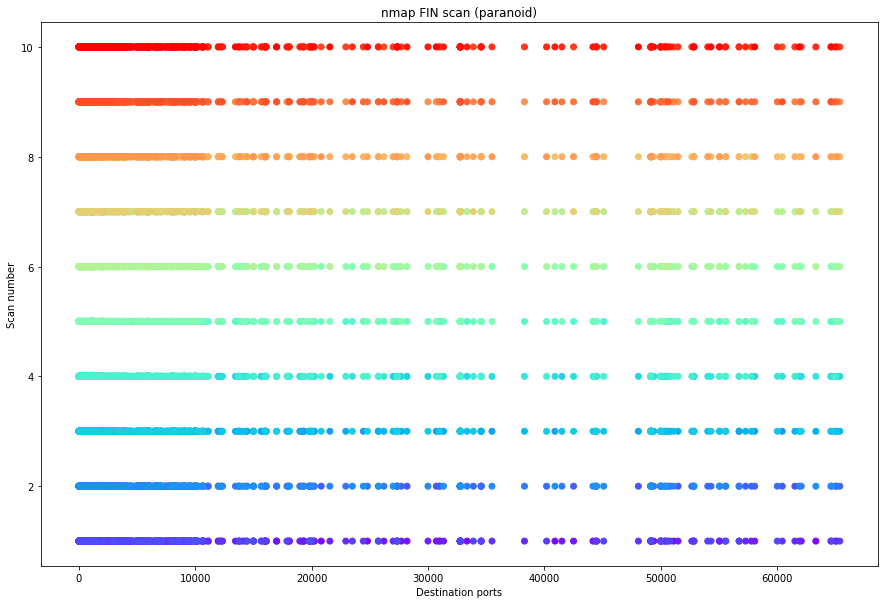

In [19]:
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()

## Payloads

In [20]:
payloads.value_counts()

0.0    10990
dtype: int64

## IP-ID

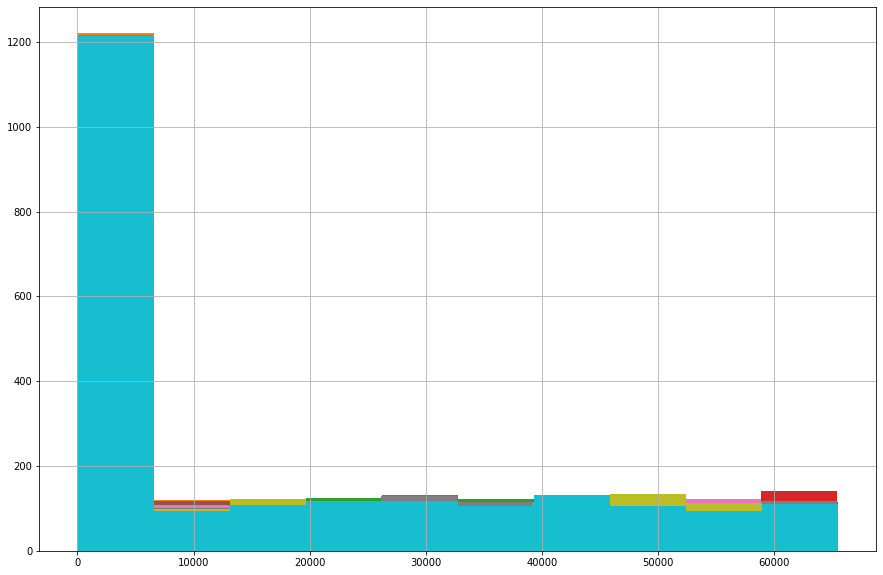

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

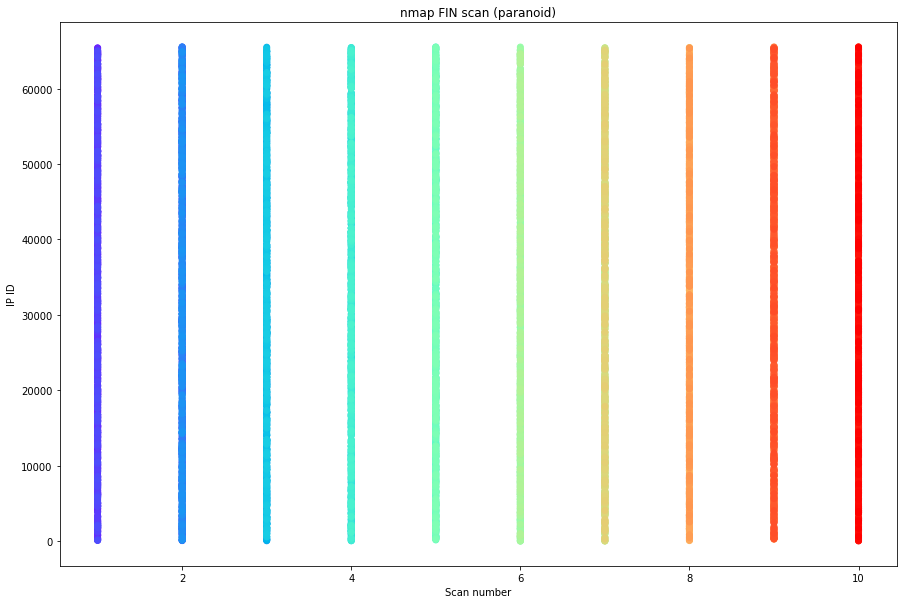

In [25]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

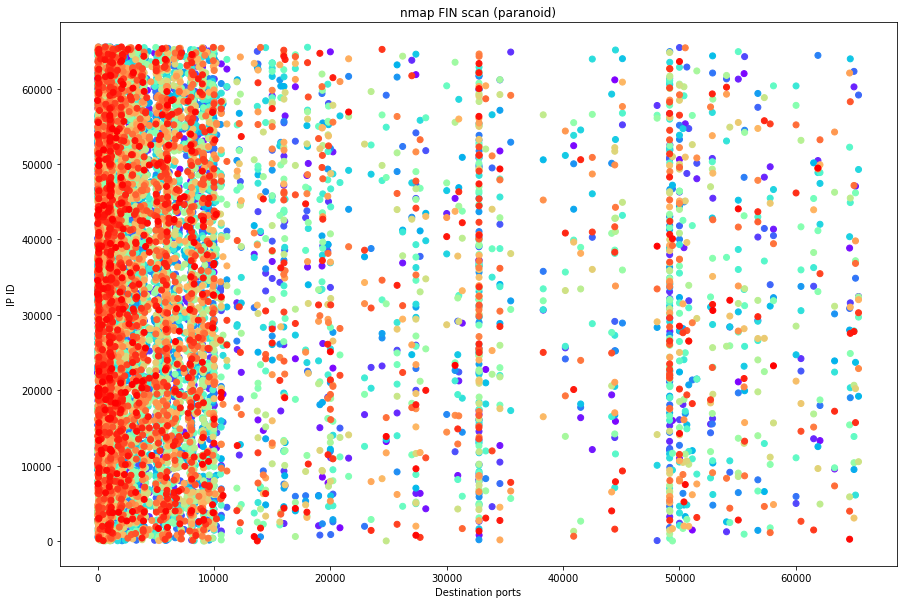

In [26]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])


if dst_ports:
    x = dst_ports
    ys = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

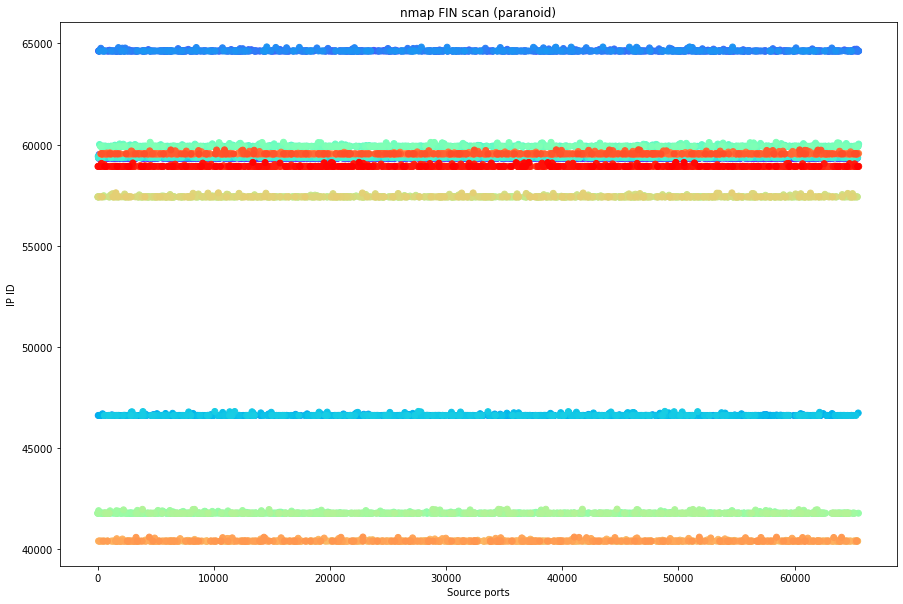

In [27]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Source ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [28]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [29]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [30]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 21324827
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 21455897
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 21586967
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence num

Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 29451423
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 29582493
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 29713563
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence number: 20997150
Sequence num

Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2142802597
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2143195811
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2143064737
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 214

Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2132447751
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
Sequence number: 2144572110
-----
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657696374
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence numbe

Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2665167556
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2664774346
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2664905416
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 2657892979
Sequence number: 265

Sequence number: 3502960314
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3502829240
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3503222462
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3498307315
Sequence number: 3503091388
Sequence number: 3498307315
Sequence number: 349

Sequence number: 144767978
Sequence number: 144178141
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144309203
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144440273
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144571351
Sequence number: 144767978
Sequence number: 144767978
S

Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 137624441
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 137755519
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 137886589
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
Sequence number: 144767978
S

Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1795784463
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1795915533
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1796046603
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 1804107662
Sequence number: 180

Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1817941040
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1818072118
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1818203188
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 181

Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1820431594
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
Sequence number: 1816695843
-----
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916003003
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence numbe

Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3912726245
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3912333027
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3912464097
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 3916199614
Sequence number: 390

Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1935695969
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1935827043
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1935958117
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 193

Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1938579597
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1938710671
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 1937793153
Sequence number: 1932091432
Sequence number: 1932091432
Sequence number: 193

Sequence number: 2177903067
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2178034137
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2178165215
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2168531274
Sequence number: 2178296285
Sequence number: 2168531274
Sequence number: 216

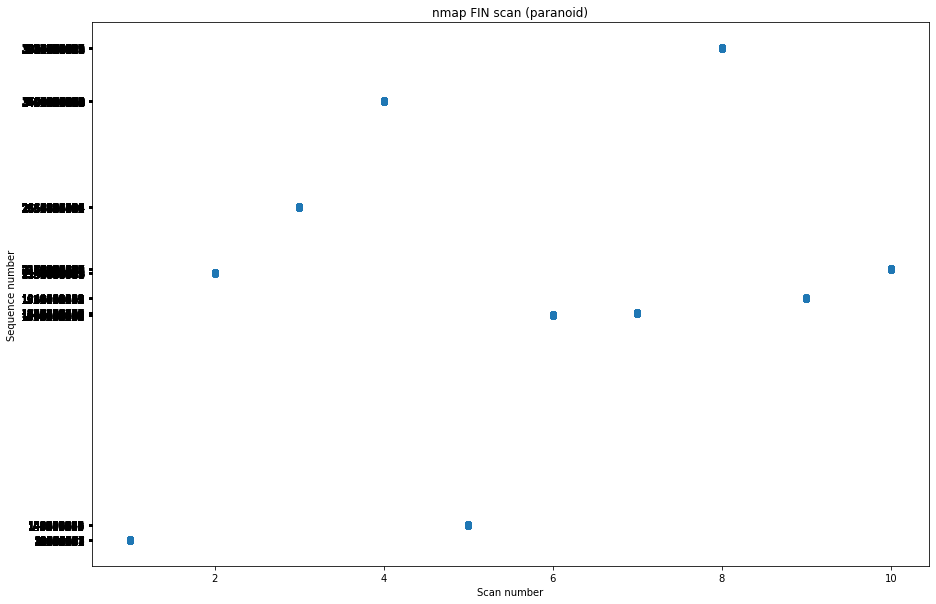

In [31]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

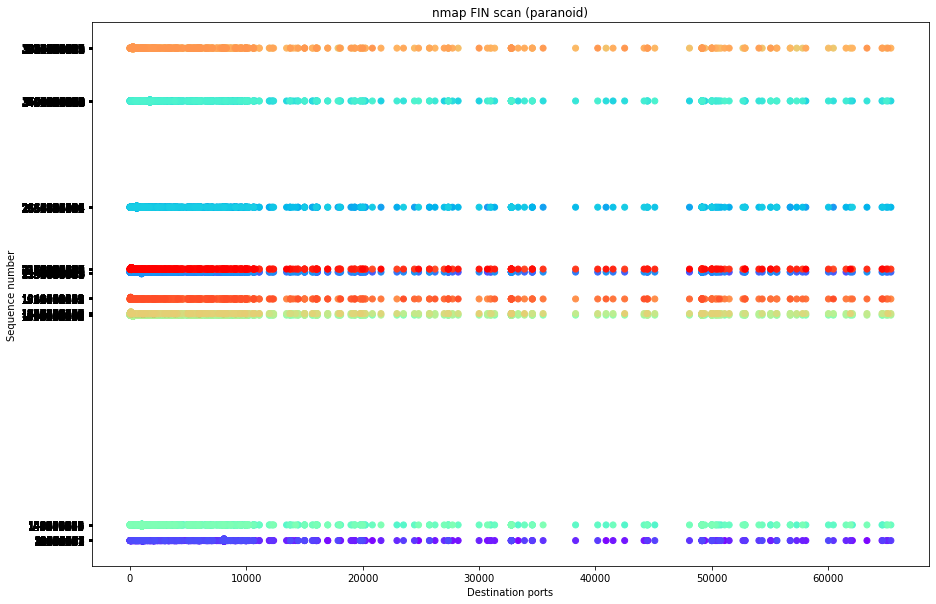

In [32]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

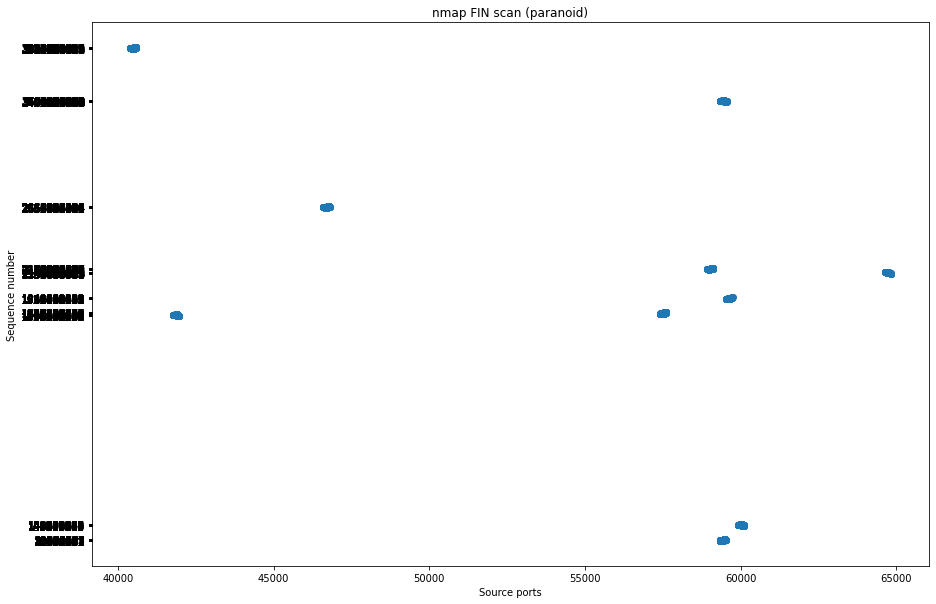

In [33]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [36]:
len(set(orders_port['sport']))

910

In [39]:
orders_port['sport'].value_counts()[:30]

59325    1000
41765    1000
59541    1000
57412    1000
59913    1000
64629    1000
59355    1000
46600    1000
58919    1000
40385    1000
59468       2
59488       2
59486       2
59484       2
59482       2
59480       2
59478       2
59476       2
59474       2
59472       2
59470       2
59464       2
59466       2
59462       2
59460       2
59492       2
59458       2
59456       2
59454       2
59452       2
Name: sport, dtype: int64

## Flags

In [34]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
-----
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flag

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F